- Pregnant : 과거 임신 횟수
- Plasma : 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)
- Pressure : 확장기 혈압
- Thickness : 삼두근 피부 주름 두께
- Insulin : 혈청 인슐린
- BMI : 체질량 지수
- Pedigree : 당뇨병 가족력
- Age : 나이

In [9]:
import pandas as pd
import numpy as np

data=pd.read_csv("./dataset/pima-indians-diabetes.csv", names=['pregnant','plasma','pressure','thickness','insulin','BMI','pedigrere','age','class'])

In [13]:
# 총 768명
print(data.shape)
print(data.isna().sum())
# 총 8개의 정보와 1개의 클래스를 추출한 데이터
data.head()


(768, 9)
pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
BMI          0
pedigrere    0
age          0
class        0
dtype: int64


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigrere,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
data[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)
# as_index=False 으로 새로운 index 생성
# 임신 횟수당 당뇨병 발병 확률

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


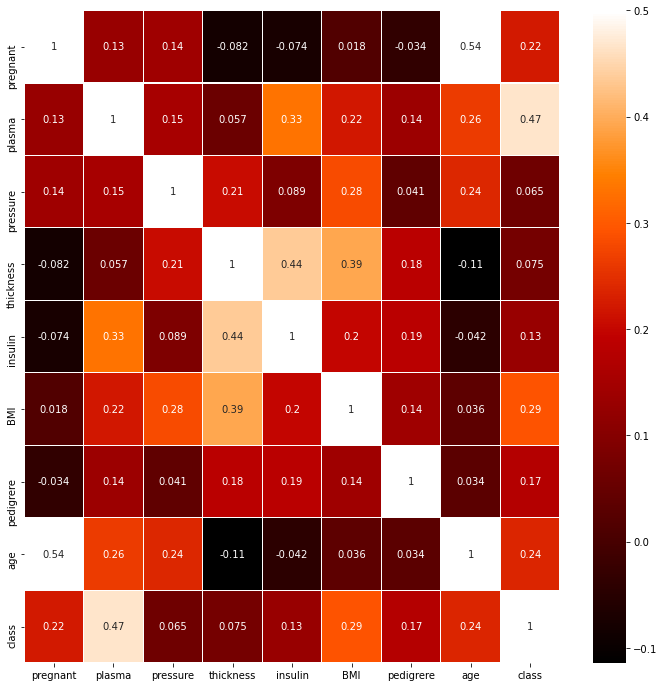

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

관촬 결과 
    - plasma 항목이 class 항목과 가장 상관관계가 높다

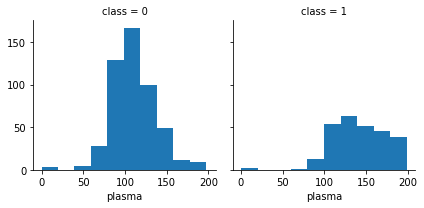

In [22]:
grid= sns.FacetGrid(data, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

관찰결과
    plasma 항목 수치가 150 이상인 경우가 많다

### Keras 활용한 당뇨병 예측
    - 최종 딥러닝 결과는 여러 번 실행하여 평균을 구하는 것이 가장 적절하다

In [25]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np


# seed 값 생성
seed=0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 로드
dataset=np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter=',')
X=dataset[:,0:8]
Y=dataset[:,8]

# 딥러닝 모델 생성
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(X,Y,epochs=200, batch_size=10)

# 결과 출력
print('\n Accuracy : %.4f'%(model.evaluate(X,Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 511us/sample - loss: 3.7402 - acc: 0.6263
Epoch 2/200
768/768 [==============================] - 0s 65us/sample - loss: 1.6155 - acc: 0.6328
Epoch 3/200
768/768 [==============================] - 0s 86us/sample - loss: 1.0777 - acc: 0.6289
Epoch 4/200
768/768 [==============================] - 0s 82us/sample - loss: 0.8879 - acc: 0.6354
Epoch 5/200
768/768 [==============================] - 0s 74us/sample - loss: 0.7626 - acc: 0.6432
Epoch 6/200
768/768 [==============================] - 0s 70us/sample - loss: 0.7186 - acc: 0.6628
Epoch 7/200
768/768 [==============================] - 0s 73us/sample - loss: 0.7081 - acc: 0.6641
Epoch 8/200
768/768 [==============================] - 0s 79us/sample - loss: 0.7069 - acc: 0.6719
Epoch 9/200
768/768 [==============================] - 0s 83us/sample - loss: 0.7019 - acc: 0.6602
Epoch 10/200
768/768 [==============================] - 0s 81us/sample - loss: 0.6757 -

768/768 [==============================] - 0s 65us/sample - loss: 0.5274 - acc: 0.7474
Epoch 83/200
768/768 [==============================] - 0s 59us/sample - loss: 0.5377 - acc: 0.7279
Epoch 84/200
768/768 [==============================] - 0s 63us/sample - loss: 0.5247 - acc: 0.7370
Epoch 85/200
768/768 [==============================] - 0s 60us/sample - loss: 0.5292 - acc: 0.7448
Epoch 86/200
768/768 [==============================] - 0s 60us/sample - loss: 0.5392 - acc: 0.7188
Epoch 87/200
768/768 [==============================] - 0s 56us/sample - loss: 0.5290 - acc: 0.7370
Epoch 88/200
768/768 [==============================] - 0s 56us/sample - loss: 0.5238 - acc: 0.7448
Epoch 89/200
768/768 [==============================] - 0s 55us/sample - loss: 0.5296 - acc: 0.7318
Epoch 90/200
768/768 [==============================] - 0s 60us/sample - loss: 0.5551 - acc: 0.7318
Epoch 91/200
768/768 [==============================] - 0s 61us/sample - loss: 0.5298 - acc: 0.7279
Epoch 92/200


768/768 [==============================] - 0s 59us/sample - loss: 0.4954 - acc: 0.7526
Epoch 164/200
768/768 [==============================] - 0s 59us/sample - loss: 0.5048 - acc: 0.7539
Epoch 165/200
768/768 [==============================] - 0s 61us/sample - loss: 0.5025 - acc: 0.7474
Epoch 166/200
768/768 [==============================] - 0s 58us/sample - loss: 0.4995 - acc: 0.7396
Epoch 167/200
768/768 [==============================] - 0s 58us/sample - loss: 0.4963 - acc: 0.7487
Epoch 168/200
768/768 [==============================] - 0s 58us/sample - loss: 0.5047 - acc: 0.7578
Epoch 169/200
768/768 [==============================] - 0s 57us/sample - loss: 0.5147 - acc: 0.7487
Epoch 170/200
768/768 [==============================] - 0s 64us/sample - loss: 0.5090 - acc: 0.7578
Epoch 171/200
768/768 [==============================] - 0s 56us/sample - loss: 0.4967 - acc: 0.7552
Epoch 172/200
768/768 [==============================] - 0s 55us/sample - loss: 0.5008 - acc: 0.7474
Epoc

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
